In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [9]:
data.shape

(2509, 22)

In [14]:
#check if theres any NA
data.dropna().shape

(2509, 22)

## Encoding the categorical predicators -> 0, 1, 2 . . .

In [7]:
data.head()

,Age.at.Diagnosis,Cancer.Type,Cancer.Type.Detailed,Cellularity..high...3..moderate...2..low...1.,Chemotherapy,Pam50...Claudin.low.subtype,Cohort,ER.status.measured.by.IHC,ER.Status,Neoplasm.Histologic.Grade,...,Tumor.Other.Histologic.Subtype,Inferred.Menopausal.State,Primary.Tumor.Laterality,Lymph.nodes.examined.positive,Mutation.Count,Nottingham.prognostic.index,Oncotree.Code,PR.Status,Tumor.Size,Tumor.Stage
0,75.65,0,2,2,0,6,1,1,1,3,...,0,0,1,10,6,6.044,2,0,22.0,2
1,43.19,0,2,0,0,2,1,1,1,3,...,0,1,1,0,2,4.020,2,1,10.0,1
2,48.87,0,2,0,1,3,1,1,1,2,...,0,1,1,1,2,4.030,2,1,15.0,2
3,47.68,0,5,2,1,3,1,1,1,2,...,4,1,1,3,1,4.050,6,1,25.0,2
4,76.97,0,5,0,1,3,1,1,1,3,...,4,0,1,8,2,6.080,6,1,40.0,2


In [5]:
from sklearn import linear_model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
for i in data: 
    if isinstance(data[i][0], str):
        data[i]= le.fit_transform(data[i])

In [194]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Tumor.Stage   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     65.49
Date:                Sun, 27 Nov 2022   Prob (F-statistic):          2.38e-219
Time:                        15:32:24   Log-Likelihood:                -1588.8
No. Observations:                2509   AIC:                             3222.
Df Residuals:                    2487   BIC:                             3350.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [11]:
X = data.loc[:, data.columns != 'Tumor.Stage']
Y = data['Tumor.Stage']
print(X.shape)


(2509, 21)


# Spliting Train-Test sets

In [64]:
X_train, X_test, y_train, y_test = train_test_split( update_data, Y, test_size=0.2, random_state=42)

## Simple Linear Regression

In [10]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)

### Since the LR model output is numerical, and our desire output is classes. 
### So we set the different cut-off line for these numeric output as category output.

In [71]:
print('Correct Training Classification Rate is:',round(sum(y_pred==y_train)/len(y_train),3) *100 ,'%')
print('MSE Training for LR:', sum((y_pred-y_train)**2)/len(y_train))

/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_52114/3578510354.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('Correct Training Classification Rate is:',round(sum(y_pred==y_train)/len(y_train),3) *100 ,'%')


ValueError: ('Lengths must match to compare', (2007,), (502,))

In [12]:
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    elif y_pred[i] < 1.5:
        y_pred[i] = 1
    elif y_pred[i] < 2.5:
        y_pred[i] = 2
    elif y_pred[i] < 3.5:
        y_pred[i] = 3
    else:
        y_pred[i] = 4

In [13]:
print('Correct Training Classification Rate is:',round(sum(y_pred==y_train)/len(y_train),3) *100 ,'%')
print('MSE Training for LR:', sum((y_pred-y_train)**2)/len(y_train))

Correct Training Classification Rate is: 76.0 %
MSE Training for LR: 0.27404085700049824


In [313]:
y_pred = reg.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    elif y_pred[i] < 1.5:
        y_pred[i] = 1
    elif y_pred[i] < 2.5:
        y_pred[i] = 2
    elif y_pred[i] < 3.5:
        y_pred[i] = 3
    else:
        y_pred[i] = 4
print('Correct Test Classification Rate is:',round(sum(y_pred==y_test)/len(y_test) *100,2)  ,'%')
print('MSE Test for LR:', sum((y_pred-y_test)**2)/len(y_test))

Correct Test Classification Rate is: 74.1 %
MSE Test for LR: 0.28884462151394424


In [217]:
import random

Correct Test Classification Rate is: 79.60000000000001 %
Correct Test Classification Rate is: 73.2 %
Correct Test Classification Rate is: 78.4 %
Correct Test Classification Rate is: 77.2 %
Correct Test Classification Rate is: 74.8 %
Correct Test Classification Rate is: 76.0 %
Correct Test Classification Rate is: 76.0 %
Correct Test Classification Rate is: 75.6 %
Correct Test Classification Rate is: 72.39999999999999 %
Correct Test Classification Rate is: 76.4 %


In [212]:
X[:5]

,Age.at.Diagnosis,Cancer.Type,Cancer.Type.Detailed,Cellularity..high...3..moderate...2..low...1.,Chemotherapy,Pam50...Claudin.low.subtype,Cohort,ER.status.measured.by.IHC,ER.Status,Neoplasm.Histologic.Grade,...,HER2.Status,Tumor.Other.Histologic.Subtype,Inferred.Menopausal.State,Primary.Tumor.Laterality,Lymph.nodes.examined.positive,Mutation.Count,Nottingham.prognostic.index,Oncotree.Code,PR.Status,Tumor.Size
0,75.65,0,2,2,0,6,1,1,1,3,...,0,0,0,1,10,6,6.044,2,0,22.0
1,43.19,0,2,0,0,2,1,1,1,3,...,0,0,1,1,0,2,4.020,2,1,10.0
2,48.87,0,2,0,1,3,1,1,1,2,...,0,0,1,1,1,2,4.030,2,1,15.0
3,47.68,0,5,2,1,3,1,1,1,2,...,0,4,1,1,3,1,4.050,6,1,25.0
4,76.97,0,5,0,1,3,1,1,1,3,...,0,4,0,1,8,2,6.080,6,1,40.0


## Lasso 

In [314]:
reg_lasso = linear_model.Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)
y_pred = reg_lasso.predict(X_test)

In [315]:
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    elif y_pred[i] < 1.5:
        y_pred[i] = 1
    elif y_pred[i] < 2.5:
        y_pred[i] = 2
    elif y_pred[i] < 3.5:
        y_pred[i] = 3
    else:
        y_pred[i] = 4

In [316]:
print('Classification Rate for Lasso is:',round(sum(y_test==y_pred)/len(y_pred),3) *100 ,'%')

Classification Rate for Lasso is: 71.3 %


## Ridge

In [317]:
#from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha=.5)
reg_ridge.fit(X_train, y_train)
y_pred = reg_ridge.predict(X_test)

In [318]:
for i in range(len(y_pred)):
    if y_pred[i] < 1:
        y_pred[i] = 0
    elif y_pred[i] < 1.5:
        y_pred[i] = 1
    elif y_pred[i] < 2.5:
        y_pred[i] = 2
    elif y_pred[i] < 3.3:
        y_pred[i] = 3
    else:
        y_pred[i] = 4

In [319]:
print('Classification Rate for Ridge is:',round(sum(y_test==y_pred)/len(y_pred),3) *100 ,'%')

Classification Rate for Ridge is: 73.1 %


In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [578]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [580]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [585]:
sum(y_pred==3)

1

In [581]:
print('Classification Rate for Logistic Regresiom is:',round(sum(y_train==y_pred)/len(y_train),3) *100 ,'%')

Classification Rate for Logistic Regresiom is: 77.10000000000001 %


In [14]:
from sklearn.neural_network import MLPClassifier
#from sklearn.datasets import make_classification

The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [545]:
update_data.shape

(2509, 16)

In [24]:
clf = MLPClassifier(random_state=42, max_iter=500,solver='adam',hidden_layer_sizes=(4,)).fit(X_train, y_train)


print(np.mean(cross_val_score(clf, update_data, Y, cv=10)))
y_pred = clf.predict(X_test)
print('Classification Rate for NN is:',sum(y_test==y_pred)/len(y_pred) *100 ,'%')
print('MSE:',mean_squared_error(y_test,y_pred))

/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yun/opt/anaconda3/lib/pyt

0.7712111553784861
Classification Rate for NN is: 79.4820717131474 %
MSE: 0.2410358565737052


/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
clf.get_params()

In [75]:
clf = MLPClassifier(random_state=42, max_iter=700,solver='adam',hidden_layer_sizes=(100,100,)).fit(X_train, y_train)

In [73]:
y_pred = clf.predict(X_test)

In [17]:
def mean_squared_error(y_p,y_t):
    return sum((y_p-y_t)**2)/len(y_t)

In [76]:
#clf = MLPClassifier(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Classification Rate for NN is:',sum(y_test==y_pred)/len(y_pred) *100 ,'%')
print('MSE:',mean_squared_error(y_test,y_pred))

Classification Rate for NN is: 76.69322709163346 %
MSE: 0.23904382470119523


In [ ]:
mse = []
cv = []
lo = 1
for i in range(3,30):

In [ ]:
for i in range(4,20,2):
    print(i)

In [ ]:
if lo > np.mean(cross_val_score(clf, update_data, Y, cv=10)):
        lo = np.mean(cross_val_score(clf, update_data, Y, cv=10))
        lo_x = i
        clf = MLPClassifier(random_state=42, max_iter=1000,solver='adam',hidden_layer_sizes=(i,int(i**0.5),)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cv.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

In [23]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [70]:
cv = []
mse = []
lo = 1
for i in range(8,16,1):
    clf = MLPClassifier(random_state=42, max_iter=1000,solver='adam',hidden_layer_sizes=(i,)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    #np.mean(cross_val_score(clf, X_train, y_train, cv=10))
    print('Classification Rate for NN is:',sum(y_test==y_pred)/len(y_pred) *100 ,'%')
    cv.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    print('MSE:',mean_squared_error(y_test,y_pred))

Classification Rate for NN is: 77.29083665338645 %
MSE: 0.26294820717131473
Classification Rate for NN is: 74.7011952191235 %
MSE: 0.2948207171314741
Classification Rate for NN is: 75.4980079681275 %
MSE: 0.29282868525896416
Classification Rate for NN is: 78.68525896414343 %
MSE: 0.23107569721115537
Classification Rate for NN is: 74.30278884462152 %
MSE: 0.29282868525896416
Classification Rate for NN is: 77.29083665338645 %
MSE: 0.26294820717131473
Classification Rate for NN is: 78.48605577689243 %
MSE: 0.250996015936255
Classification Rate for NN is: 79.08366533864542 %
MSE: 0.23306772908366533


Best CV scroe for NN at 78.88 %


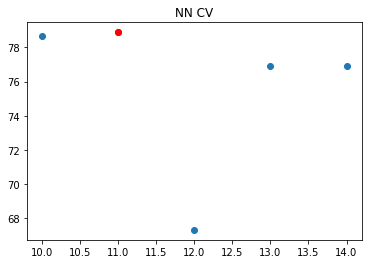

In [48]:
plt.scatter(range(10,15,1),cv)
plt.scatter(11,max(cv),color='red')
plt.title('NN CV')
print('Best CV scroe for NN at',round(max(cv),2),'%')

ValueError: x and y must be the same size

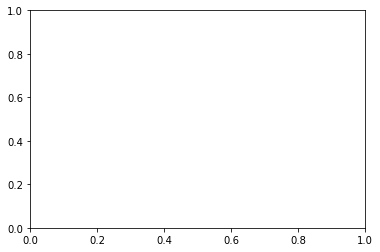

In [68]:
import matplotlib.pyplot as plt
plt.scatter(range(10,15,1),mse)
plt.scatter(10,min(mse),color='red')
plt.title('NN MSE')

<AxesSubplot:>

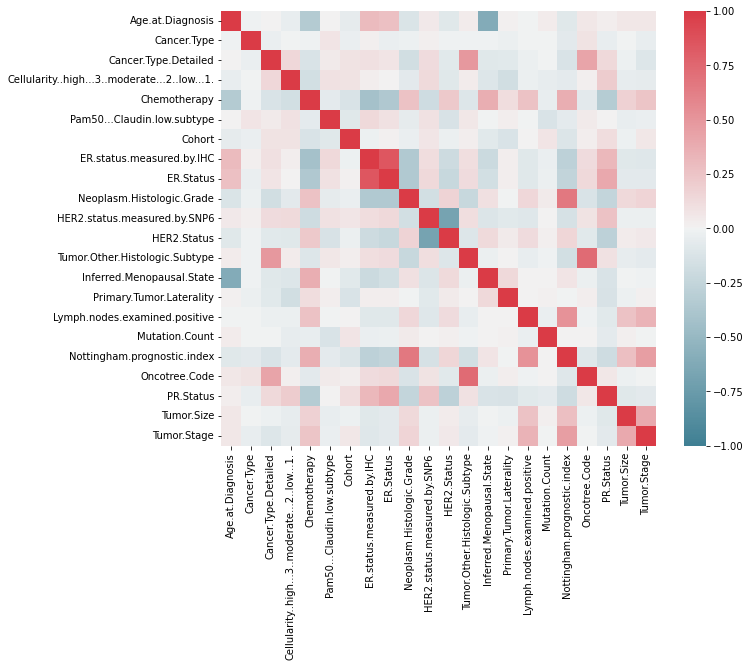

In [306]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [498]:
update_data =data[['Age.at.Diagnosis',
 'Chemotherapy',
 'ER.status.measured.by.IHC',
 'ER.Status',
 'Neoplasm.Histologic.Grade',
 'Lymph.nodes.examined.positive',
 'Nottingham.prognostic.index',
 'Tumor.Size']]




In [63]:
update_data =data[['Age.at.Diagnosis',
 'Cancer.Type',
 'Cancer.Type.Detailed',
 'Cellularity..high...3..moderate...2..low...1.',
 'Chemotherapy',
 'Pam50...Claudin.low.subtype',
 'Cohort',
 'ER.status.measured.by.IHC',
 'ER.Status',
 'Neoplasm.Histologic.Grade',
 'HER2.Status',
 'Tumor.Other.Histologic.Subtype', 
 'Lymph.nodes.examined.positive',
 'Mutation.Count',
 'Nottingham.prognostic.index',
 'Tumor.Size']]


#removed: 'PR.Status', 'Primary.Tumor.Laterality', 'HER2.status.measured.by.SNP6', 'Oncotree.Code''Inferred.Menopausal.State',

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv= []
for i in range(10):
    cv.append(random.sample(range(n_samples), int(n_samples/10)))
for j in cv:
    y_pred = reg.predict(X.iloc[j,])
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            y_pred[i] = 0
        elif y_pred[i] < 1.5:
            y_pred[i] = 1
        elif y_pred[i] < 2.5:
            y_pred[i] = 2
        elif y_pred[i] < 3.5:
            y_pred[i] = 3
        else:
            y_pred[i] = 4
    print('Correct Test Classification Rate is:',round(sum(y_pred==Y[j])/len(y_pred),3) *100 ,'%')

# After we implement NN, we try to backpropagate

In [353]:
import numpy as np

In [459]:
learning_rate = 0.1
iterations =500
N = y_train.size

#input feature
input_size = update_data.shape[1]

#hidden layers 
hidden_size = 10

#output layers 
output_size = 1

results = pd.DataFrame(columns=['mse','accuracy'])

In [460]:
#Initialize Weights
np.random.seed(10)

#hidden layer
W1 = np.random.normal(scale = 0.5, size = (input_size, hidden_size))

#output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [465]:
def linear_unit(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = max(x[i][j],0)
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
def accuracy(y_pred, y_true):
    acc = y_pred == y_true
    return acc.mean()

In [466]:
#Backpropagation

for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    #print(Z1, Z1.shape)
    A1 = linear_unit(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = linear_unit(Z2)
    #print(A2, A2.shape)
    #A2 = A2.T[0]
    #print(A2, A2.shape)
    # Calculating the error
    
    mse = mean_squared_error(A2.T[0], y_train)
    acc = accuracy(A2.T[0], y_train)
    print(mse,acc)
    results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    #print(results)
    # Backpropagation phase
    #print(A2, A2.shape, y_train.shape)
    E1 = A2.T[0] - y_train
    dW1 = E1 * A2.T[0] * (1 - A2.T[0])
    
    #print(dW1.shape, dW2.shape)
    E2 = np.dot(pd.DataFrame(dW1), W2.T)
    dW2 = E2 * A1 * (1 - A1)
    
    #print(A1.T.shape, pd.DataFrame(dW1).shape)
    # Updating the weights
    W2_update = np.dot(A1.T, pd.DataFrame(dW1)) / N
    #print(W2_update.shape,W2.shape)
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


7975.756791837221 0.0
1.6341113058478996e+27 0.0
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122
1.7717987045341306 0.009466865969108122


/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append({"mse":mse, "accuracy":acc},ignore_index=True )
/var/folders/xd/39vn4ttx5239g2gxfkr0tm_r0000gn/T/ipykernel_47487/2820687247.py:21: FutureWarning: The frame.append method is deprecated and will be removed f

In [464]:
results

,mse,accuracy


In [375]:
X_train.shape

(2007, 18)

In [59]:
print(sum(y_test==0),sum(y_test==1),sum(y_test==2),sum(y_test==3),sum(y_test==4))

5 125 338 33 1


In [ ]:
# Random Forest

In [ ]:
np.mean(cross_val_score(clf, X_train, y_train, cv=10))

In [ ]:

ax.scatter(i,j, cv_score, color = "black")

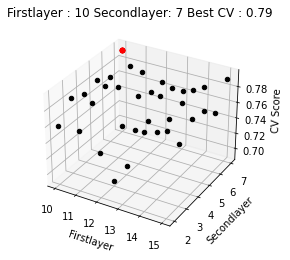

In [67]:


fig = plt.figure()
ax=fig.add_subplot(projection='3d')

best_score_nn = 0

for i in range(10,16):
    for j in range(2,8):
        clf = MLPClassifier(random_state=42, max_iter=2000,solver='adam',hidden_layer_sizes=(i,j,)).fit(X_train, y_train)
        #y_pred = clf.predict(X_test)
        #cv.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
        cv_score = cross_val_score(clf, X_train, y_train, cv=10).mean()
        ax.scatter(i,j, cv_score, color = "black")
        if cv_score > best_score_nn:
            best_firstlayer = i
            best_secondlayer=j
            best_score_nn = cv_score
    ax.scatter(best_firstlayer,best_secondlayer, best_score_nn, color = "red")
l = ax.set(title = "Firstlayer : " + str(best_firstlayer)+ " Secondlayer: " + str(best_secondlayer) + " Best CV : " + str("{:.2f}".format(best_score_nn)),
       xlabel = "Firstlayer", 
       ylabel = "Secondlayer",
       zlabel = "CV Score")

In [80]:
clf.params

AttributeError: 'RandomForestClassifier' object has no attribute 'params'

In [77]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
np.mean(cross_val_score(clf, update_data, Y, cv=10))

0.8748398406374502

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
mse = []
cv = []
lo = 1
for i in range(3,30):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print('Correct Test Classification Rate is:',round(sum(y_pred==y_test)/len(y_pred),3) *100 ,'%')
    print('MSE:',mean_squared_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    if lo > np.mean(cross_val_score(clf, update_data, Y, cv=10)):
        lo = np.mean(cross_val_score(clf, update_data, Y, cv=10))
        lo_x = i
    cv.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
    print(sum(y_pred==0),sum(np.array(y_pred)==1),sum(y_pred==2),sum(y_pred==3),sum(y_pred==4))

Correct Test Classification Rate is: 81.69999999999999 %
MSE: 0.21912350597609562
0 92 410 0 0
Correct Test Classification Rate is: 83.5 %
MSE: 0.20119521912350596
0 100 399 3 0
Correct Test Classification Rate is: 83.89999999999999 %
MSE: 0.19721115537848605
0 101 395 6 0
Correct Test Classification Rate is: 84.1 %
MSE: 0.20119521912350596
0 103 391 8 0
Correct Test Classification Rate is: 85.7 %
MSE: 0.1553784860557769
5 107 381 9 0
Correct Test Classification Rate is: 85.5 %
MSE: 0.15139442231075698
5 110 379 8 0
Correct Test Classification Rate is: 86.1 %
MSE: 0.1454183266932271
5 111 374 12 0
Correct Test Classification Rate is: 86.1 %
MSE: 0.15139442231075698
5 116 371 10 0
Correct Test Classification Rate is: 86.3 %
MSE: 0.13745019920318724
5 117 366 14 0
Correct Test Classification Rate is: 86.7 %
MSE: 0.1394422310756972
5 117 365 15 0
Correct Test Classification Rate is: 87.6 %
MSE: 0.1294820717131474
5 123 358 16 0
Correct Test Classification Rate is: 88.4 %
MSE: 0.1155378486

In [61]:
1

1

In [ ]:
clf = RandomForestClassifier(max_depth=i, random_state=0)

In [603]:
max(cv)

0.8868756218905472

Text(0.5, 1.0, 'Random Forest CV score')

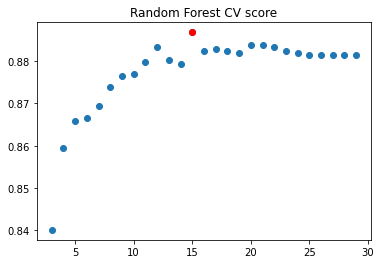

In [602]:
plt.scatter(range(3,30),cv)
plt.scatter(15,max(cv),color='red')
plt.title('Random Forest CV score')

Text(0.5, 1.0, 'Random Forest MSE')

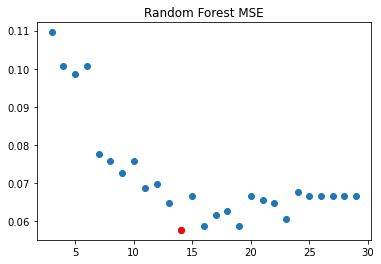

In [598]:
plt.scatter(range(3,30),mse)
plt.scatter(14,0.05776892430278884,color='red')
plt.title('Random Forest MSE')

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

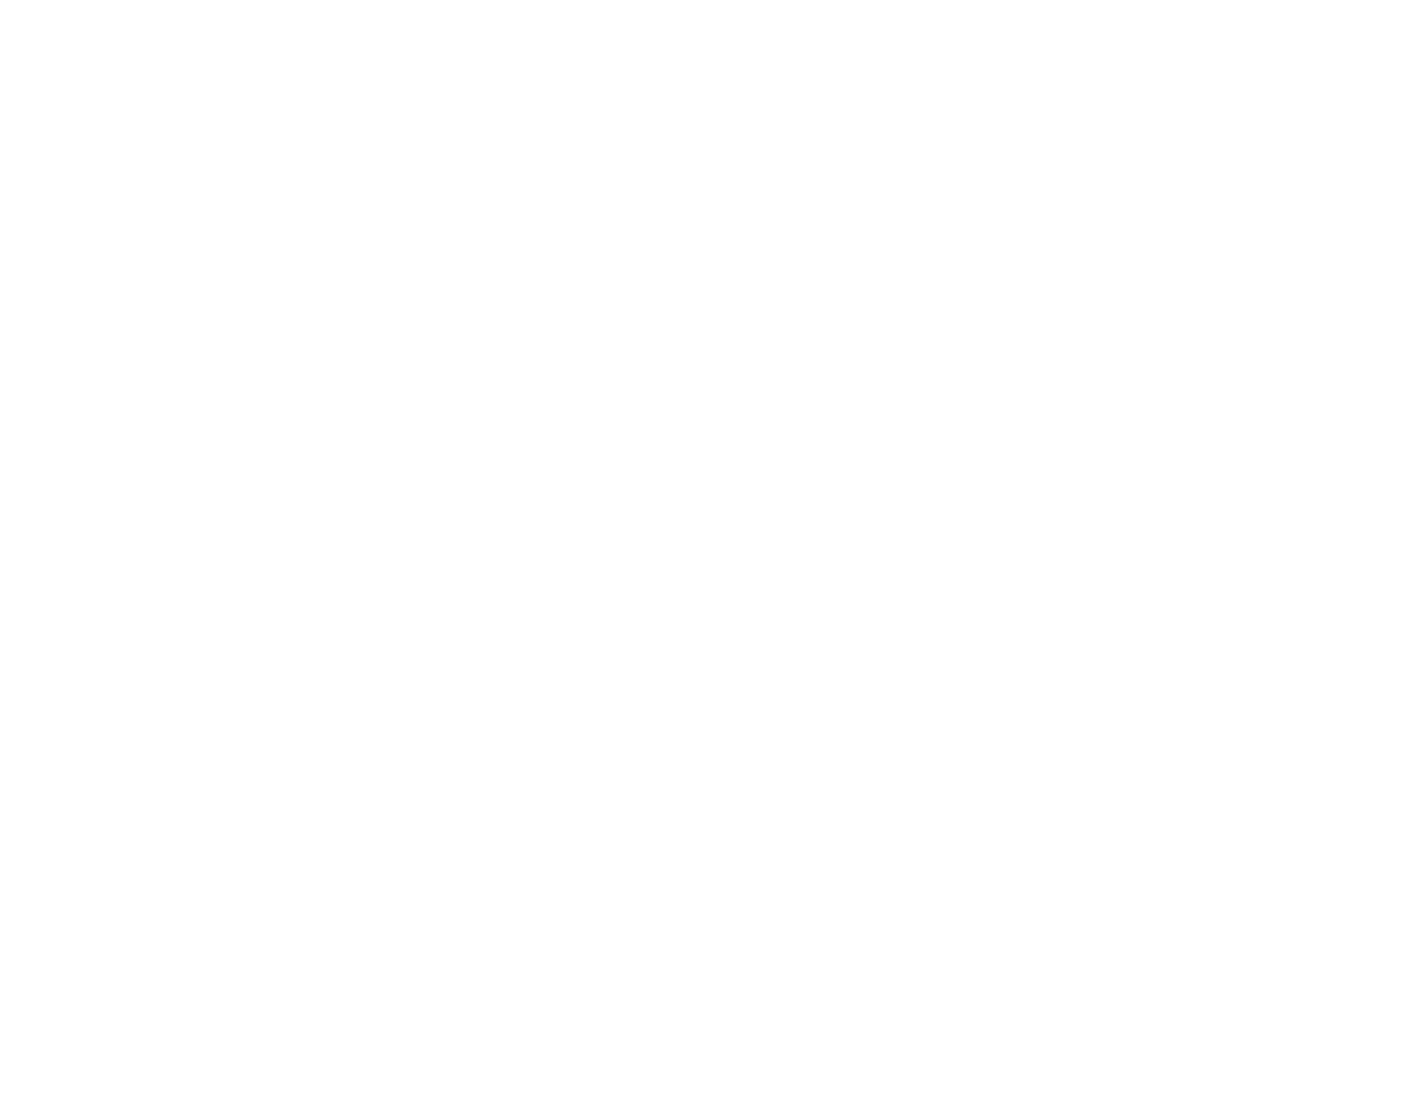

In [525]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names = X_train.columns,
                class_names = 'Tumor Stage',
                   filled=True)

In [532]:
import os
os.environ["PATH"] += os.pathsep + 'C:/GraphViz/bin'

In [531]:
from sklearn import tree
import graphviz
dot_data= tree.export_graphviz(clf.estimators_[0], out_file=None, 
                                feature_names = X_train.columns,
                                class_names = 'Tumor Stage',
                                filled=True)
##tree.plot_tree(clf)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [535]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)

training_score = clf.score(X_train,y_train)
testing_score = clf.score(X_test,y_test)

print("Training score: " + str(training_score) + "\nTesting score: " + str(testing_score))


plt.scatter(range(3,30),mse)
plt.scatter(14,0.05776892430278884,color='red')
plt.title('Random Forest MSE')

Training score: 0.746885899352267
Testing score: 0.7470119521912351


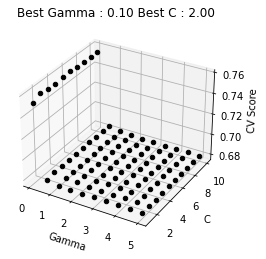

In [53]:
from sklearn import svm

fig = plt.figure()
ax=fig.add_subplot(projection='3d')

best_score_svm = 0

for i in np.linspace(0.1,5,10):
    for j in np.linspace(1,10,10):
        SVM = svm.SVC(gamma=i,C=j)
        SVM.fit(X_train, y_train)
        cv_score = cross_val_score(SVM, X_train, y_train, cv=10).mean()
        ax.scatter(i,j, cv_score, color = "black")
        if cv_score > best_score_svm:
            best_depth = i
            best_C=j
            best_score_svm = cv_score

l = ax.set(title = "Best Gamma : " + str("{:.2f}".format(best_depth))+ " Best C : " + str("{:.2f}".format(best_C)),
       xlabel = "Gamma", 
       ylabel = "C",
       zlabel = "CV Score")

In [60]:
best_score_svm

0.7568233830845771